This Python code conducts data preprocessing, logistic regression modeling, and visual representation of results of the dataset DIS. 

The code is written by Robin Engelhardt.

In [1]:
%matplotlib inline
import io
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

In [13]:
datafile_DTU_qual = '../data/DIS.xlsx'

Load the data into dataframe:

In [14]:
df_DTU_qual = pd.DataFrame(pd.read_excel(datafile_DTU_qual))
df = df_DTU_qual[['card','choice']]
df.head()

,card,choice
0,4,1
1,5,1
2,5,1
3,6,1
4,5,1


In [15]:
len(df)

210

The logistic regression takes longer time with confidence intervals due to the bootstrapping. Set n_boot to 10000 for the final plot.

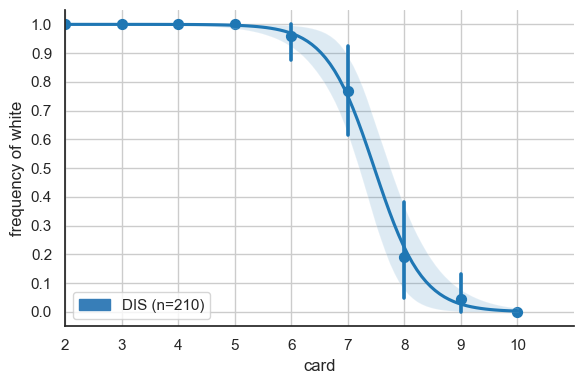

In [ ]:
g = sns.lmplot(x="card", y="choice", data=df,
               logistic=True, ci=95, n_boot=10000, x_estimator=np.mean, x_ci="ci", palette='#377eb8',
               y_jitter=.2, legend=False, height=4, aspect=1.5)

#plt.setp(g.lines, alpha=1) # setting translucency of CI to zero
g.set(xlim=(2, 11))
g.set(ylabel='frequency of white')
g.set(xticks=[2,3,4,5,6,7,8,9,10], yticks=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9, 1])
#g.set(xticklabels = ["8:00", "8:10", "8:20", "8:30", "8:40", "8:50", "9:00", "9:10"])

# make my own legend:
name_to_color = {
    'DIS (n=210)': '#377eb8'
}
patches = [patch.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, loc='lower left')
plt.grid()
plt.tight_layout()

plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig5_DIS.png'),
            bbox_inches='tight', transparent=True, dpi=300)
#plt.savefig(os.path.join(PLOTS_DIR, 'fig5_DIS.pdf'), transparent=True, dpi=300)
sns.despine()